# Datahacks!!

In [20]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import bar_chart_race as bcr

In [21]:
df = pd.read_csv('data.csv')
df

,name,diet,period,lived_in,type,length,taxonomy,named_by,species,link
0,aardonyx,herbivorous,Early Jurassic 199-189 million years ago,South Africa,sauropod,8.0m,Dinosauria Saurischia Sauropodomorpha Prosauro...,Yates Bonnan Neveling Chinsamy and Blackbeard ...,celestae,https://www.nhm.ac.uk/discover/dino-directory/...
1,abelisaurus,carnivorous,Late Cretaceous 74-70 million years ago,Argentina,large theropod,9.0m,Dinosauria Saurischia Theropoda Neotheropoda C...,Bonaparte and Novas (1985),comahuensis,https://www.nhm.ac.uk/discover/dino-directory/...
2,achelousaurus,herbivorous,Late Cretaceous 83-70 million years ago,USA,ceratopsian,6.0m,Dinosauria Ornithischia Genasauria Cerapoda Ma...,Sampson (1995),horneri,https://www.nhm.ac.uk/discover/dino-directory/...
3,achillobator,carnivorous,Late Cretaceous 99-84 million years ago,Mongolia,large theropod,5.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Perle Norell and Clark (1999),giganteus,https://www.nhm.ac.uk/discover/dino-directory/...
4,acrocanthosaurus,carnivorous,Early Cretaceous 115-105 million years ago,USA,large theropod,12.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Stovall and Langston (1950),atokensis,https://www.nhm.ac.uk/discover/dino-directory/...
...,...,...,...,...,...,...,...,...,...,...
304,yuanmousaurus,herbivorous,Mid Jurassic 180-159 million years ago,China,sauropod,17.0m,Dinosauria Saurischia Sauropodomorpha Sauropod...,Lü Li Ji Wang Zhang and Dong (2006),jiangyiensis,https://www.nhm.ac.uk/discover/dino-directory/...
305,yunnanosaurus,omnivorous,Early Jurassic 205-190 million years ago,China,sauropod,7.0m,Dinosauria Saurischia Sauropodomorpha Prosauro...,Young (1942),huangi,https://www.nhm.ac.uk/discover/dino-directory/...
306,zalmoxes,herbivorous,Late Cretaceous 69 million years ago,Romania,euornithopod,3.0m,Dinosauria Ornithischia Genasauria Cerapoda Or...,Nopcsa (1902),robustus,https://www.nhm.ac.uk/discover/dino-directory/...
307,zephyrosaurus,herbivorous,Early Cretaceous 120-110 million years ago,USA,euornithopod,1.8m,Dinosauria Ornithischia Genasauria Cerapoda Or...,Sues (1980),schaffi,https://www.nhm.ac.uk/discover/dino-directory/...


In [22]:
df = df.dropna() # dropping NaN rows
df

def get_period_name (period_str):
    period_list = period_str.split() # splitting by white space and gets list of strings
    period_name = period_list[0] + " " + period_list[1]
    return period_name

def get_period_to (period_str):
    period_list = period_str.split() # splitting by white space and gets list of strings
    if len(period_list) > 2:
        if "-" not in period_str:
            return int(period_list[2])
        else:
            period_years = period_list[2].split('-')
            return int(period_years[0])

def get_period_from (period_str):
    period_list = period_str.split() # splitting by white space and gets list of strings
    
    if len(period_list) > 2:
        if "-" not in period_str:
            return int(period_list[2])
        else:
            period_years = period_list[2].split('-')
            return int(period_years[1])

def str_to_num (length_str):
    str_list = length_str.replace('m','')
    return float(str_list)

names = df.get('period').apply(get_period_name)
to_year = df.get('period').apply(get_period_to)
from_year = df.get('period').apply(get_period_from)
int_len = df.get('length').apply(str_to_num)

cleaned_df = df.assign(period_name = names, to_years_ago = to_year, from_years_ago = from_year, len_as_int = int_len)

cleaned_df = cleaned_df.dropna()
cleaned_df

#get_period_to("Early Jurassic 199-189 million years ago")

,name,diet,period,lived_in,type,length,taxonomy,named_by,species,link,period_name,to_years_ago,from_years_ago,len_as_int
0,aardonyx,herbivorous,Early Jurassic 199-189 million years ago,South Africa,sauropod,8.0m,Dinosauria Saurischia Sauropodomorpha Prosauro...,Yates Bonnan Neveling Chinsamy and Blackbeard ...,celestae,https://www.nhm.ac.uk/discover/dino-directory/...,Early Jurassic,199.0,189.0,8.0
1,abelisaurus,carnivorous,Late Cretaceous 74-70 million years ago,Argentina,large theropod,9.0m,Dinosauria Saurischia Theropoda Neotheropoda C...,Bonaparte and Novas (1985),comahuensis,https://www.nhm.ac.uk/discover/dino-directory/...,Late Cretaceous,74.0,70.0,9.0
2,achelousaurus,herbivorous,Late Cretaceous 83-70 million years ago,USA,ceratopsian,6.0m,Dinosauria Ornithischia Genasauria Cerapoda Ma...,Sampson (1995),horneri,https://www.nhm.ac.uk/discover/dino-directory/...,Late Cretaceous,83.0,70.0,6.0
3,achillobator,carnivorous,Late Cretaceous 99-84 million years ago,Mongolia,large theropod,5.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Perle Norell and Clark (1999),giganteus,https://www.nhm.ac.uk/discover/dino-directory/...,Late Cretaceous,99.0,84.0,5.0
4,acrocanthosaurus,carnivorous,Early Cretaceous 115-105 million years ago,USA,large theropod,12.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Stovall and Langston (1950),atokensis,https://www.nhm.ac.uk/discover/dino-directory/...,Early Cretaceous,115.0,105.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,yinlong,herbivorous,Mid Jurassic 159-154 million years ago,China,ceratopsian,1.2m,Dinosauria Ornithischia Genasauria Cerapoda Ma...,Xu Forster Clark and Mo (2006),downsi,https://www.nhm.ac.uk/discover/dino-directory/...,Mid Jurassic,159.0,154.0,1.2
304,yuanmousaurus,herbivorous,Mid Jurassic 180-159 million years ago,China,sauropod,17.0m,Dinosauria Saurischia Sauropodomorpha Sauropod...,Lü Li Ji Wang Zhang and Dong (2006),jiangyiensis,https://www.nhm.ac.uk/discover/dino-directory/...,Mid Jurassic,180.0,159.0,17.0
305,yunnanosaurus,omnivorous,Early Jurassic 205-190 million years ago,China,sauropod,7.0m,Dinosauria Saurischia Sauropodomorpha Prosauro...,Young (1942),huangi,https://www.nhm.ac.uk/discover/dino-directory/...,Early Jurassic,205.0,190.0,7.0
306,zalmoxes,herbivorous,Late Cretaceous 69 million years ago,Romania,euornithopod,3.0m,Dinosauria Ornithischia Genasauria Cerapoda Or...,Nopcsa (1902),robustus,https://www.nhm.ac.uk/discover/dino-directory/...,Late Cretaceous,69.0,69.0,3.0


In [23]:
cleaned_df.get("period_name").unique() # number of different period names

array(['Early Jurassic', 'Late Cretaceous', 'Early Cretaceous',
       'Late Jurassic', 'Mid Jurassic', 'Late Triassic'], dtype=object)

In [24]:
dino_length_df = cleaned_df.groupby(['period_name', "length"]).count().get(['name'])
dino_length_df

name
period_name      length      
Early Cretaceous 0.25m      1
                 0.45m      1
                 0.8m       1
                 1.0m       3
                 1.3m       1
...                       ...
Mid Jurassic     5.0m       1
                 5.7m       1
                 7.0m       1
                 7.6m       1
                 9.0m       2

[150 rows x 1 columns]

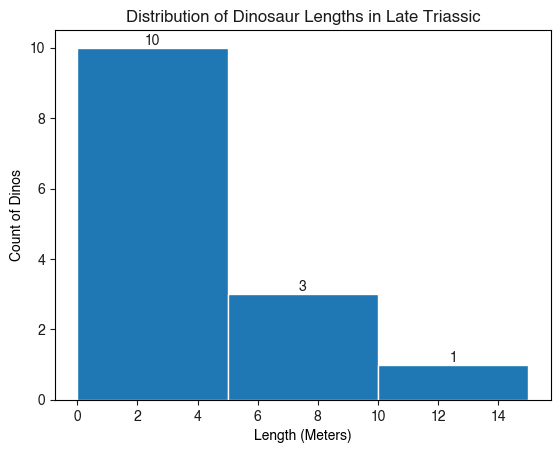

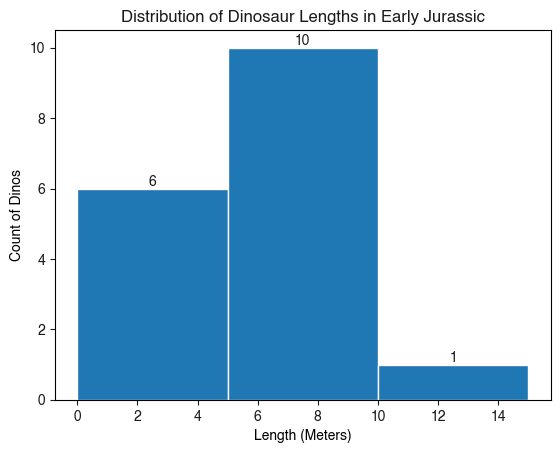

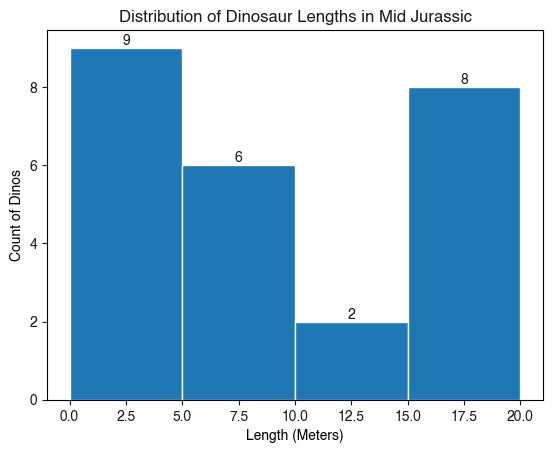

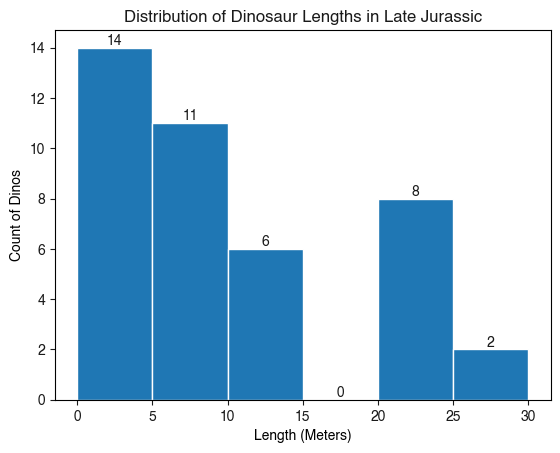

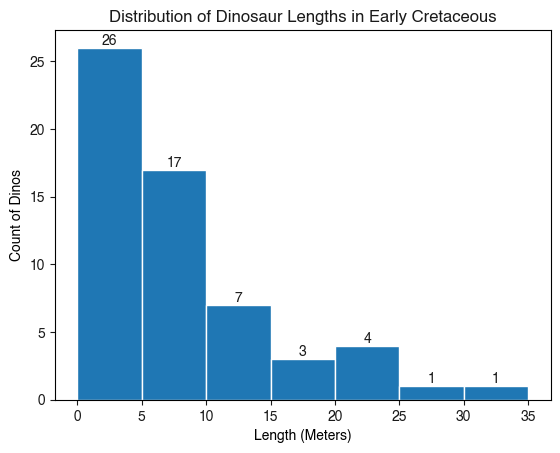

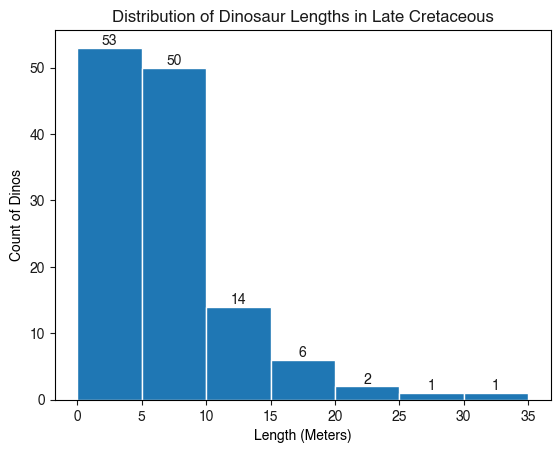

In [25]:
def plot_dino_len (time_period_name):
    ec_dino_length_df = cleaned_df[cleaned_df['period_name'].str.contains(time_period_name)]

    # ec_dino_length_df = ec_dino_length_df.groupby('len_as_int').count().reset_index().get(['name','len_as_int']).sort_values(by= 'name', ascending = True)
    # ec_dino_length_df
    bin = np.arange(0,max(ec_dino_length_df["len_as_int"]) + 5, 5)
    # ec_dino_length_df.plot(kind='hist', bins=bin, x= 'len_as_int', xlabel = 'Length (Meters)', title = time_period_name + " Dinosaur Lengths", legend = False)
    plt.figure()
    dino_counts, dino_edges, dino_bars = plt.hist(ec_dino_length_df["len_as_int"], bins=bin, ec = 'w')
    plt.bar_label(dino_bars)

    plt.xlabel('Length (Meters)')
    plt.ylabel('Count of Dinos')
    plt.title('Distribution of Dinosaur Lengths in ' + time_period_name)

plot_dino_len('Late Triassic')
plot_dino_len('Early Jurassic')
plot_dino_len("Mid Jurassic")
plot_dino_len('Late Jurassic')
plot_dino_len("Early Cretaceous")
plot_dino_len("Late Cretaceous")

Cleaning Dataframe to Add Average Years Ago as Column


In [31]:
cleaned_df

,name,diet,period,lived_in,type,length,taxonomy,named_by,species,link,period_name,to_years_ago,from_years_ago,len_as_int
0,aardonyx,herbivorous,Early Jurassic 199-189 million years ago,South Africa,sauropod,8.0m,Dinosauria Saurischia Sauropodomorpha Prosauro...,Yates Bonnan Neveling Chinsamy and Blackbeard ...,celestae,https://www.nhm.ac.uk/discover/dino-directory/...,Early Jurassic,199.0,189.0,8.0
1,abelisaurus,carnivorous,Late Cretaceous 74-70 million years ago,Argentina,large theropod,9.0m,Dinosauria Saurischia Theropoda Neotheropoda C...,Bonaparte and Novas (1985),comahuensis,https://www.nhm.ac.uk/discover/dino-directory/...,Late Cretaceous,74.0,70.0,9.0
2,achelousaurus,herbivorous,Late Cretaceous 83-70 million years ago,USA,ceratopsian,6.0m,Dinosauria Ornithischia Genasauria Cerapoda Ma...,Sampson (1995),horneri,https://www.nhm.ac.uk/discover/dino-directory/...,Late Cretaceous,83.0,70.0,6.0
3,achillobator,carnivorous,Late Cretaceous 99-84 million years ago,Mongolia,large theropod,5.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Perle Norell and Clark (1999),giganteus,https://www.nhm.ac.uk/discover/dino-directory/...,Late Cretaceous,99.0,84.0,5.0
4,acrocanthosaurus,carnivorous,Early Cretaceous 115-105 million years ago,USA,large theropod,12.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Stovall and Langston (1950),atokensis,https://www.nhm.ac.uk/discover/dino-directory/...,Early Cretaceous,115.0,105.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,yinlong,herbivorous,Mid Jurassic 159-154 million years ago,China,ceratopsian,1.2m,Dinosauria Ornithischia Genasauria Cerapoda Ma...,Xu Forster Clark and Mo (2006),downsi,https://www.nhm.ac.uk/discover/dino-directory/...,Mid Jurassic,159.0,154.0,1.2
304,yuanmousaurus,herbivorous,Mid Jurassic 180-159 million years ago,China,sauropod,17.0m,Dinosauria Saurischia Sauropodomorpha Sauropod...,Lü Li Ji Wang Zhang and Dong (2006),jiangyiensis,https://www.nhm.ac.uk/discover/dino-directory/...,Mid Jurassic,180.0,159.0,17.0
305,yunnanosaurus,omnivorous,Early Jurassic 205-190 million years ago,China,sauropod,7.0m,Dinosauria Saurischia Sauropodomorpha Prosauro...,Young (1942),huangi,https://www.nhm.ac.uk/discover/dino-directory/...,Early Jurassic,205.0,190.0,7.0
306,zalmoxes,herbivorous,Late Cretaceous 69 million years ago,Romania,euornithopod,3.0m,Dinosauria Ornithischia Genasauria Cerapoda Or...,Nopcsa (1902),robustus,https://www.nhm.ac.uk/discover/dino-directory/...,Late Cretaceous,69.0,69.0,3.0


In [143]:
# Function below finds grouping for year based on every 10 years 

def group_avg_year (year):
    avg_year_range = int(year // 10) * 10
    return avg_year_range

years_ago_avg = (cleaned_df.get('to_years_ago') + cleaned_df.get('from_years_ago'))/2
updated_cleaned_df = cleaned_df.assign(avg_years_ago = years_ago_avg)


year_grouping_avg = updated_cleaned_df.get('avg_years_ago').apply(group_avg_year)
updated_cleaned_df = updated_cleaned_df.assign(avg_year_grouping = year_grouping_avg)

updated_cleaned_df


,name,diet,period,lived_in,type,length,taxonomy,named_by,species,link,period_name,to_years_ago,from_years_ago,len_as_int,avg_years_ago,avg_year_grouping
0,aardonyx,herbivorous,Early Jurassic 199-189 million years ago,South Africa,sauropod,8.0m,Dinosauria Saurischia Sauropodomorpha Prosauro...,Yates Bonnan Neveling Chinsamy and Blackbeard ...,celestae,https://www.nhm.ac.uk/discover/dino-directory/...,Early Jurassic,199.0,189.0,8.0,194.0,190
1,abelisaurus,carnivorous,Late Cretaceous 74-70 million years ago,Argentina,large theropod,9.0m,Dinosauria Saurischia Theropoda Neotheropoda C...,Bonaparte and Novas (1985),comahuensis,https://www.nhm.ac.uk/discover/dino-directory/...,Late Cretaceous,74.0,70.0,9.0,72.0,70
2,achelousaurus,herbivorous,Late Cretaceous 83-70 million years ago,USA,ceratopsian,6.0m,Dinosauria Ornithischia Genasauria Cerapoda Ma...,Sampson (1995),horneri,https://www.nhm.ac.uk/discover/dino-directory/...,Late Cretaceous,83.0,70.0,6.0,76.5,70
3,achillobator,carnivorous,Late Cretaceous 99-84 million years ago,Mongolia,large theropod,5.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Perle Norell and Clark (1999),giganteus,https://www.nhm.ac.uk/discover/dino-directory/...,Late Cretaceous,99.0,84.0,5.0,91.5,90
4,acrocanthosaurus,carnivorous,Early Cretaceous 115-105 million years ago,USA,large theropod,12.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Stovall and Langston (1950),atokensis,https://www.nhm.ac.uk/discover/dino-directory/...,Early Cretaceous,115.0,105.0,12.0,110.0,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,yinlong,herbivorous,Mid Jurassic 159-154 million years ago,China,ceratopsian,1.2m,Dinosauria Ornithischia Genasauria Cerapoda Ma...,Xu Forster Clark and Mo (2006),downsi,https://www.nhm.ac.uk/discover/dino-directory/...,Mid Jurassic,159.0,154.0,1.2,156.5,150
304,yuanmousaurus,herbivorous,Mid Jurassic 180-159 million years ago,China,sauropod,17.0m,Dinosauria Saurischia Sauropodomorpha Sauropod...,Lü Li Ji Wang Zhang and Dong (2006),jiangyiensis,https://www.nhm.ac.uk/discover/dino-directory/...,Mid Jurassic,180.0,159.0,17.0,169.5,160
305,yunnanosaurus,omnivorous,Early Jurassic 205-190 million years ago,China,sauropod,7.0m,Dinosauria Saurischia Sauropodomorpha Prosauro...,Young (1942),huangi,https://www.nhm.ac.uk/discover/dino-directory/...,Early Jurassic,205.0,190.0,7.0,197.5,190
306,zalmoxes,herbivorous,Late Cretaceous 69 million years ago,Romania,euornithopod,3.0m,Dinosauria Ornithischia Genasauria Cerapoda Or...,Nopcsa (1902),robustus,https://www.nhm.ac.uk/discover/dino-directory/...,Late Cretaceous,69.0,69.0,3.0,69.0,60


In [144]:
# Number of unique year groupings
unique_values = updated_cleaned_df['avg_year_grouping'].unique()
unique_values

array([190,  70,  90, 110, 120, 160,  60,  80, 150, 180, 170, 140, 100,
       130, 210, 220, 200])

In [145]:
updated_cleaned_df = updated_cleaned_df.groupby(['avg_year_grouping','lived_in']).count()
updated_cleaned_df = updated_cleaned_df.get('name')
updated_cleaned_df

avg_year_grouping  lived_in      
60                 Argentina         3
                   Canada            1
                   France            1
                   India             1
                   Mongolia          2
                                    ..
210                USA               1
                   United Kingdom    1
220                Argentina         2
                   Brazil            1
                   South Africa      1
Name: name, Length: 98, dtype: int64

Bar Chart Race


In [108]:
bcr.bar_chart_race(
    df = updated_cleaned_df[:5], # only testing first 5 rows for now
    filename = 'dinosaur_race.mp4',
  )  

/Users/jennifer/anaconda3/envs/datahacks/lib/python3.12/site-packages/bar_chart_race/_make_chart.py:889: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_values.iloc[:, 0] = df_values.iloc[:, 0].fillna(method='ffill')


TypeError: '<' not supported between instances of 'float' and 'str'